X.shape: (300, 2)
X[:,0][:5]: [0.17640524 0.04001572 0.0978738  0.22408931 0.1867558 ]
X[:,1][:5]: [0.6883151  0.3652241  0.3729515  0.5969397  0.38268766]
y.shape: (300,)
y[:5]:      [0 0 0 0 0]
y[100:105]: [1 1 1 1 1]
y[200:205]: [2 2 2 2 2]


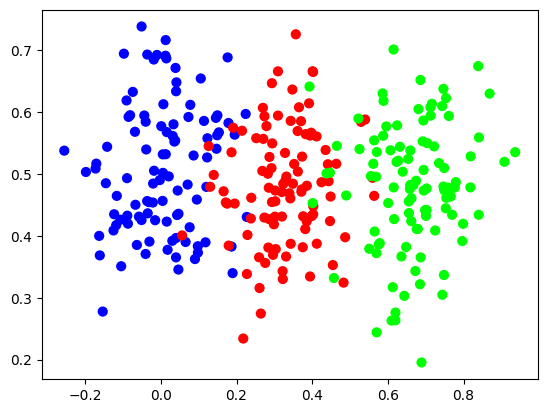

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()           
# Create dataset
# 100 samples, 3 classes, total: 300 samples
X, y = vertical_data(samples=100, classes=3)
print('X.shape:', X.shape) 
#  X.shape: (300, 2)
# 300 samples (= 100 sample x 3 classes)
# Each sample is represented by (x0, x1)
print('X[:,0][:5]:', X[:,0][:5])
print('X[:,1][:5]:', X[:,1][:5])
# Print target labels
print('y.shape:', y.shape)
# y.shape: (300,)
# toally 300 samples for target (0, 1, 2) 
# sample 0 to 99: target/label = 0
print('y[:5]:     ', y[:5])
# sample 100 to 105: target/label = 1
print('y[100:105]:', y[100:105])
# sample 200 to 205: target/label = 2
print('y[200:205]:', y[200:205])
# c: color, s: shape, cmap: Color map (B, R, G)
# Data in (x0, x1): x0 = X[:, 0], x1 = X[:, 1], target data y = [0, 1, 2]
plt.scatter(X[:,0], X[:, 1], c = y, s=40, cmap='brg')
plt.show()

New set of weights found, iteration: 0 loss: 1.0987684 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0987465 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.0976487 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 1.0972018 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0938749 acc: 0.3333333333333333
New set of weights found, iteration: 19 loss: 1.0935849 acc: 0.6666666666666666
New set of weights found, iteration: 20 loss: 1.0908297 acc: 0.3333333333333333
New set of weights found, iteration: 21 loss: 1.0905013 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0879314 acc: 0.3333333333333333
New set of weights found, iteration: 24 loss: 1.0856307 acc: 0.3333333333333333
New set of weights found, iteration: 25 loss: 1.0801181 acc: 0.35
New set of weights found, iteration: 29 loss: 1.0725244 acc: 0.5266666666666666
New set of weights found, iteration: 30 loss: 1.0724432 ac

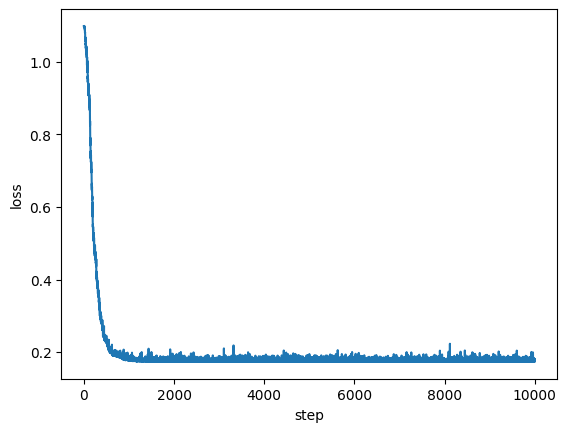

In [33]:
# This case use Verical Data, i.e., Verical classifier. It is too easy for deep learning
# Deep Learning never used Verical classifier.
import matplotlib.pyplot as plt
import numpy as np
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()
# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

# Common loss class
class Loss:
    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        # Calculate mean loss
        data_loss = np.mean(sample_losses)
        # Return loss
        return data_loss

# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)
        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped*y_true,
                axis=1
            )
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
      
# Create dataset. This is verical data. It is too easy for deep learning
X, y = vertical_data(samples=100, classes=3)
# Create model
dense1 = Layer_Dense(2, 3)  # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# Helper variables
lowest_loss = 9999999  # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

loss_x = []
loss_y = []
for iteration in range(10000):
    # Update weights with some small random values
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()
    loss_x.append(iteration)
    loss_y.append(loss)    
plt.plot(loss_x, loss_y)
plt.xlabel("step")
plt.ylabel("loss")
plt.show()

X.shape: (300, 2)
X[:,0][:5]: [0.         0.00299556 0.01288097 0.02997479 0.03931246]
X[:,1][:5]: [0.         0.00964661 0.01556285 0.0044481  0.00932828]
y.shape: (300,)
y[:5]:      [0 0 0 0 0]
y[100:105]: [1 1 1 1 1]
y[200:205]: [2 2 2 2 2]


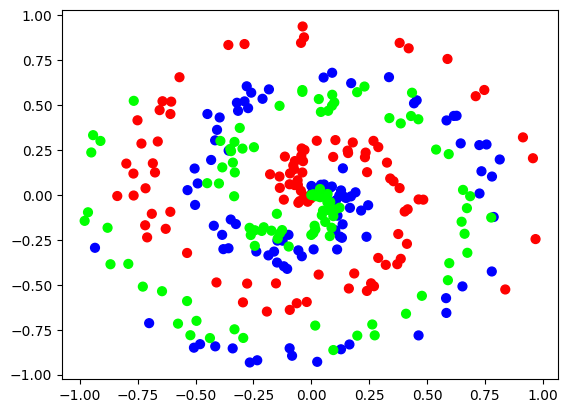

In [43]:
# Load the Spiral Data
import matplotlib.pyplot as plt
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()           
# Create dataset
# 100 samples, 3 classes, total: 300 samples
# Read the Spiral Data
X, y = spiral_data(samples=100, classes=3)
print('X.shape:', X.shape) 
#  X.shape: (300, 2)
# 300 samples (= 100 sample x 3 classes)
# Each sample is represented by (x0, x1)
print('X[:,0][:5]:', X[:,0][:5])
print('X[:,1][:5]:', X[:,1][:5])
# Print target labels
print('y.shape:', y.shape)
# y.shape: (300,)
# toally 300 samples for target (0, 1, 2) 
# sample 0 to 99: target/label = 0
print('y[:5]:     ', y[:5])
# sample 100 to 105: target/label = 1
print('y[100:105]:', y[100:105])
# sample 200 to 205: target/label = 2
print('y[200:205]:', y[200:205])
# c: color, s: shape, cmap: Color map (B, R, G)
# Data in (x0, x1): x0 = X[:, 0], x1 = X[:, 1], target data y = [0, 1, 2]
plt.scatter(X[:,0], X[:, 1], c = y, s=40, cmap='brg')
plt.show()

New set of weights found, iteration: 0 loss: 1.1008677 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0994315 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.0991219 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0986339 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.0986199 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.0984716 acc: 0.36333333333333334
New set of weights found, iteration: 18 loss: 1.0983391 acc: 0.3333333333333333
New set of weights found, iteration: 27 loss: 1.0982698 acc: 0.3333333333333333
New set of weights found, iteration: 31 loss: 1.0982264 acc: 0.37333333333333335
New set of weights found, iteration: 35 loss: 1.0979562 acc: 0.3333333333333333
New set of weights found, iteration: 36 loss: 1.0977433 acc: 0.3433333333333333
New set of weights found, iteration: 37 loss: 1.0976934 acc: 0.3333333333333333
New set of weights found, iteration: 44 loss

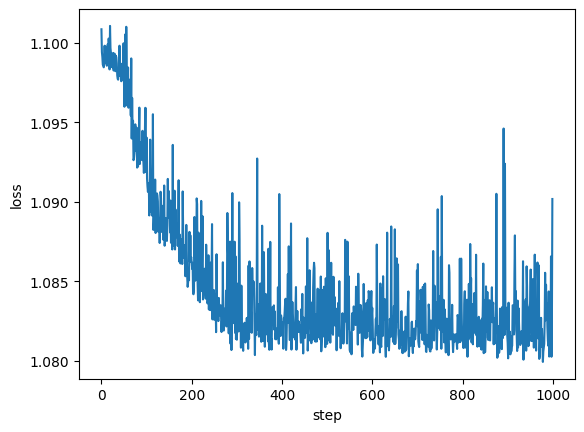

In [38]:
# Below case uses Spiral Data.
import matplotlib.pyplot as plt
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()
# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

# Common loss class
class Loss:
    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        # Calculate mean loss
        data_loss = np.mean(sample_losses)
        # Return loss
        return data_loss

# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)
        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped*y_true,
                axis=1
            )
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
      
# Create dataset. This is spiral data. Very difficult for deep learning
X, y = spiral_data(samples=100, classes=3)
# Create model
dense1 = Layer_Dense(2, 3)  # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# Helper variables
lowest_loss = 9999999  # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

loss_x = []
loss_y = []
for iteration in range(1000):
    # Update weights with some small random values
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()
    loss_x.append(iteration)
    loss_y.append(loss)    
plt.plot(loss_x, loss_y)
plt.xlabel("step")
plt.ylabel("loss")
plt.show()